In [ ]:
pip install pandas matplotlib seaborn scikit-learn


In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [17]:
# Leer el archivo CSV
df = pd.read_csv('eventos_hawkins.csv')

,Episodio,Minuto,Tipo_de_Evento,Personajes_Involucrados,Ubicacion,Resultado
0,1,5,Aparicion_de_criatura,"Mike,Lucas,Dustin,11",Desembocadura_del_bosque,Escapan
1,1,15,Desaparicion,Will_Byers,Desembocadura_del_bosque,Desaparece
2,2,30,Descubrimiento,"Mike,Lucas,Dustin,11",Hawkins_Lab,Encuentran_pista
3,3,45,Aparicion_de_criatura,11,Bosque_de_Mirkwood,Combate
4,4,10,Desaparicion,Barbara_Holland,Alberca_de_la_casa_de_Steve,Desaparece


In [ ]:

# Mostrar los primeros registros
df.head()

In [19]:
# Análisis simple: Contar tipos de eventos
tipo_eventos = df['Tipo_de_Evento'].value_counts()
print("Conteo de tipos de eventos:")
print(tipo_eventos)

Conteo de tipos de eventos:
Tipo_de_Evento
Aparicion_de_criatura    2
Desaparicion             2
Descubrimiento           2
Name: count, dtype: int64


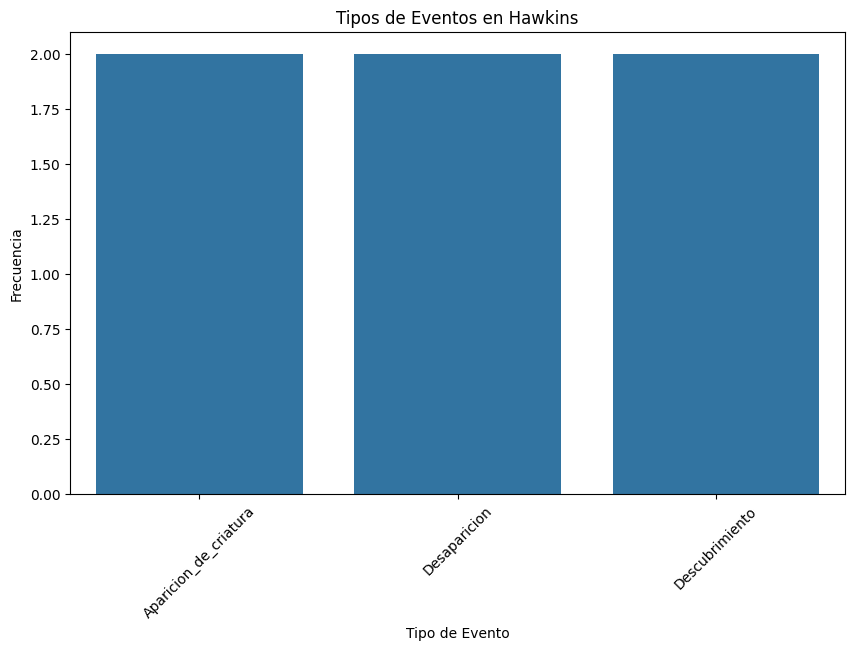

In [20]:
# Visualización de datos: Gráfico de barras de tipos de eventos
plt.figure(figsize=(10, 6))
sns.barplot(x=tipo_eventos.index, y=tipo_eventos.values)
plt.title('Tipos de Eventos en Hawkins')
plt.xlabel('Tipo de Evento')
plt.ylabel('Frecuencia')
plt.xticks(rotation=45)
plt.show()

In [21]:
# Análisis de eventos por episodio
eventos_por_episodio = df.groupby('Episodio').size()
print("Eventos por episodio:")
print(eventos_por_episodio)

Eventos por episodio:
Episodio
1    2
2    1
3    1
4    1
5    1
dtype: int64


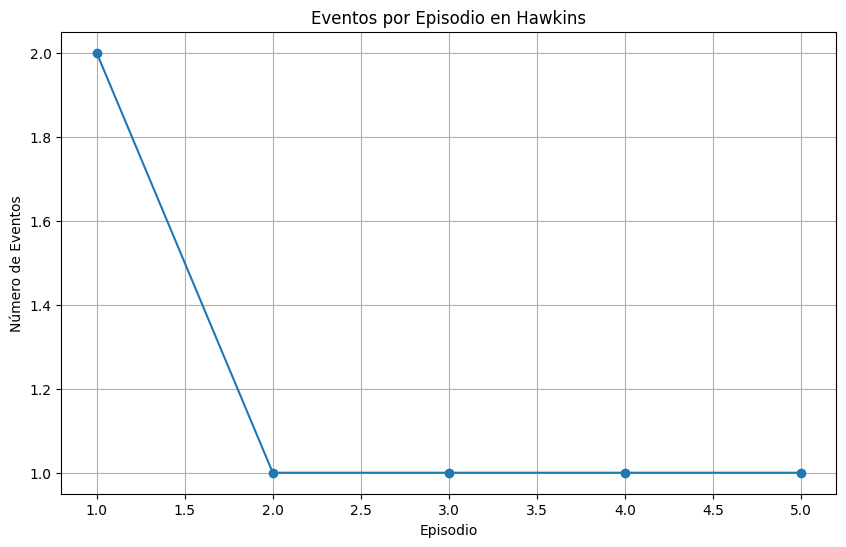

In [22]:
# Gráfico de eventos por episodio
plt.figure(figsize=(10, 6))
eventos_por_episodio.plot(kind='line', marker='o')
plt.title('Eventos por Episodio en Hawkins')
plt.xlabel('Episodio')
plt.ylabel('Número de Eventos')
plt.grid(True)
plt.show()

In [23]:

# Preprocesamiento de datos para el modelo de machine learning
df['Resultado'] = df['Resultado'].apply(lambda x: 1 if x == 'Desaparece' else 0)
X = pd.get_dummies(df[['Episodio', 'Minuto', 'Tipo_de_Evento', 'Ubicacion']])
y = df['Resultado']

In [24]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:

# Entrenamiento del modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [26]:
# Predicción
y_pred = clf.predict(X_test)

In [27]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 50.00%


In [ ]:
pip install pandas matplotlib seaborn scikit-learn numpy


In [35]:
import numpy as np


In [36]:
# Gráfico de importancia de características
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)


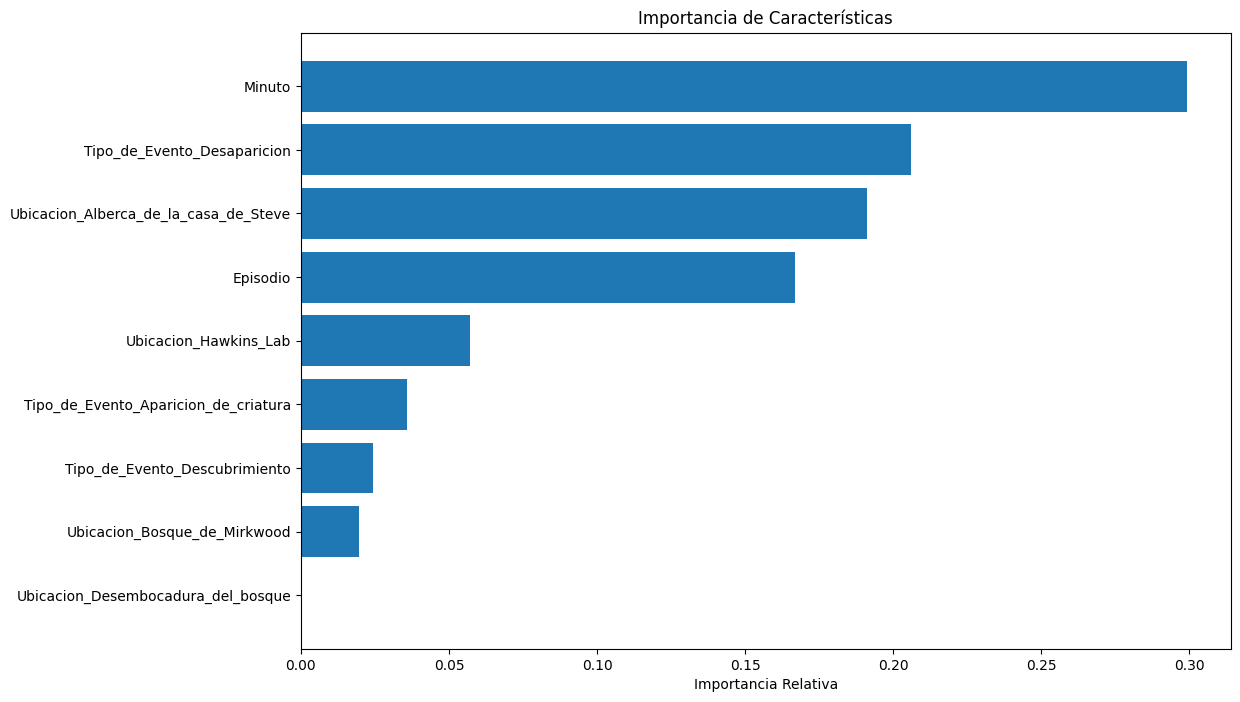

In [37]:
plt.figure(figsize=(12, 8))
plt.title('Importancia de Características')
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Importancia Relativa')
plt.show()

In [38]:
import numpy as np


In [ ]:
pip install plotly


In [41]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [42]:
# Leer el archivo CSV
df = pd.read_csv('eventos_hawkins.csv')

In [43]:
# Mostrar los primeros registros
df.head()

,Episodio,Minuto,Tipo_de_Evento,Personajes_Involucrados,Ubicacion,Resultado
0,1,5,Aparicion_de_criatura,"Mike,Lucas,Dustin,11",Desembocadura_del_bosque,Escapan
1,1,15,Desaparicion,Will_Byers,Desembocadura_del_bosque,Desaparece
2,2,30,Descubrimiento,"Mike,Lucas,Dustin,11",Hawkins_Lab,Encuentran_pista
3,3,45,Aparicion_de_criatura,11,Bosque_de_Mirkwood,Combate
4,4,10,Desaparicion,Barbara_Holland,Alberca_de_la_casa_de_Steve,Desaparece


In [44]:

# Análisis simple: Contar tipos de eventos
tipo_eventos = df['Tipo_de_Evento'].value_counts()
print("Conteo de tipos de eventos:")
print(tipo_eventos)

Conteo de tipos de eventos:
Tipo_de_Evento
Aparicion_de_criatura    2
Desaparicion             2
Descubrimiento           2
Name: count, dtype: int64


In [45]:
# Visualización de datos: Gráfico de barras de tipos de eventos
fig = px.bar(tipo_eventos, x=tipo_eventos.index, y=tipo_eventos.values, title='Tipos de Eventos en Hawkins', labels={'index':'Tipo de Evento', 'y':'Frecuencia'})
fig.show()

In [46]:
# Análisis de eventos por episodio
eventos_por_episodio = df.groupby('Episodio').size()
print("Eventos por episodio:")
print(eventos_por_episodio)


Eventos por episodio:
Episodio
1    2
2    1
3    1
4    1
5    1
dtype: int64


In [47]:
# Gráfico de eventos por episodio
fig2 = px.line(eventos_por_episodio, x=eventos_por_episodio.index, y=eventos_por_episodio.values, title='Eventos por Episodio en Hawkins', labels={'index':'Episodio', 'y':'Número de Eventos'})
fig2.show()

In [48]:
# Preprocesamiento de datos para el modelo de machine learning
df['Resultado'] = df['Resultado'].apply(lambda x: 1 if x == 'Desaparece' else 0)
X = pd.get_dummies(df[['Episodio', 'Minuto', 'Tipo_de_Evento', 'Ubicacion']])
y = df['Resultado']

In [49]:
# División de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [50]:
# Entrenamiento del modelo
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [51]:
# Predicción
y_pred = clf.predict(X_test)

In [52]:
# Evaluación del modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Precisión del modelo: {accuracy * 100:.2f}%')

Precisión del modelo: 50.00%


In [53]:
# Gráfico de importancia de características
importances = clf.feature_importances_
features = X.columns
indices = np.argsort(importances)

fig3 = go.Figure(go.Bar(
            x=importances[indices],
            y=[features[i] for i in indices],
            orientation='h'))

fig3.update_layout(
    title='Importancia de Características',
    xaxis_title='Importancia Relativa',
    yaxis_title='Características'
)

fig3.show()

In [54]:
# Diseño de un Demogorgon usando Plotly
# Crear puntos del Demogorgon
demogorgon_points = {
    'x': [0, 1, 2, 1, 0, -1, -2, -1, 0],
    'y': [0, 1, 2, 3, 4, 3, 2, 1, 0]
}

fig4 = go.Figure()

fig4.add_trace(go.Scatter(
    x=demogorgon_points['x'],
    y=demogorgon_points['y'],
    mode='lines+markers',
    name='Demogorgon'
))

fig4.update_layout(
    title='Diseño de un Demogorgon',
    xaxis_title='Coordenada X',
    yaxis_title='Coordenada Y',
    showlegend=False
)

fig4.show()

In [ ]:
pip install plotly


In [56]:
import plotly.graph_objects as go


In [57]:
# Crear puntos del Demogorgon
# Estos puntos son un ejemplo simple para representar un Demogorgon
demogorgon_points = {
    'x': [0, 0.5, 1, 1.5, 2, 1.5, 1, 0.5, 0, -0.5, -1, -1.5, -2, -1.5, -1, -0.5, 0],
    'y': [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 3.5, 3, 2.5, 2, 1.5, 1, 0.5, 0]
}

fig = go.Figure()

fig.add_trace(go.Scatter(
    x=demogorgon_points['x'],
    y=demogorgon_points['y'],
    mode='lines+markers',
    name='Demogorgon',
    line=dict(color='purple', width=3),
    marker=dict(color='purple', size=8)
))

fig.update_layout(
    title='Diseño de un Demogorgon',
    xaxis_title='Coordenada X',
    yaxis_title='Coordenada Y',
    showlegend=False
)

fig.show()

In [ ]:
pip install plotly
